<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/da09_str.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame에서 문자열 변수(컬럼) 다루기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# mpg 데이터셋

In [2]:
mpg = sns.load_dataset('mpg')

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


*   mpg 데이터프레임에 company 파생변수(컬럼)를 추가.
*   company 컬럼의 값은 name 컬럼의 첫번째 단어를 저장.

In [5]:
mpg['company'] = mpg.name.str.split().str[0]

In [6]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [7]:
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,chevy


In [8]:
companies = mpg.company.unique()
companies

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [9]:
companies.sort()
companies

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
       'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
       'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
       'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
       'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
       'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
       'vw'], dtype=object)

In [10]:
companies.size

37

## company 이름의 오타 수정

In [11]:
mpg.loc[mpg.company == 'chevroelt', 'company'] = 'chevrolet'
mpg.loc[mpg.company == 'maxda', 'company'] = 'mazda'
mpg.loc[mpg.company == 'mercedes', 'company'] = 'mercedes-benz'
mpg.loc[mpg.company == 'toyouta', 'company'] = 'toyota'
mpg.loc[mpg.company == 'vokswagen', 'company'] = 'volkswagen'

In [12]:
companies = mpg.company.unique()
companies.sort()
companies

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet',
       'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi',
       'honda', 'mazda', 'mercedes-benz', 'mercury', 'nissan',
       'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault',
       'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo', 'vw'],
      dtype=object)

In [13]:
companies.size

32

# movies 데이터셋

In [14]:
movies_file = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/movielens/movies.dat'

In [19]:
# movies.dat 파일은 값들이 '::'로 구분된 텍스트 파일.
movies = pd.read_csv(movies_file,
                     sep='::',                              # 구분자
                     names=['movie_id', 'title', 'genres'], # 컬럼 이름
                     engine='python')                       # sep='::' 때문에 발생하는 경고(warning)를 없애기 위해서

In [20]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


*   장르 분석
    *   장르가 Animation인 영화는 몇 개?
    *   가장 많이 등장하는 장르 이름?
*   개봉 연도 분석
    *   연도별 개봉 영화 숫자

## 장르가 Animation인 영화

In [25]:
animations = movies[movies.genres.str.contains('Animation')]

In [26]:
animations.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's


In [27]:
animations.tail()

,movie_id,title,genres
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's


In [30]:
animations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 3875
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  105 non-null    int64 
 1   title     105 non-null    object
 2   genres    105 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [31]:
animations.size  # 행(row)의 개수 x 열(column)의 개수

315

In [32]:
len(animations)

105

## 장르가 Drama인 영화

In [33]:
dramas = movies[movies.genres.str.contains('Drama')]

In [34]:
dramas.head()

,movie_id,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Drama|Thriller
16,17,Sense and Sensibility (1995),Drama|Romance


In [35]:
len(dramas)

1603

## 장르가 로맨틱 코미디(Romance & Comedy)인 영화

In [37]:
romantic_comedies = movies[movies.genres.str.contains('Romance') &
                           movies.genres.str.contains('Comedy')]

In [38]:
romantic_comedies.head()

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance


In [39]:
len(romantic_comedies)

204

## 가장 많이 등장하는 영화 장르 상위 10개

In [44]:
genres = []  # 장르들을 저장하기 위한 빈 리스트
for x in movies.genres:
    genres.extend(x.split(sep='|'))

In [45]:
print(genres)

['Animation', "Children's", 'Comedy', 'Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Action', 'Crime', 'Thriller', 'Comedy', 'Romance', 'Adventure', "Children's", 'Action', 'Action', 'Adventure', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Horror', 'Animation', "Children's", 'Drama', 'Action', 'Adventure', 'Romance', 'Drama', 'Thriller', 'Drama', 'Romance', 'Thriller', 'Comedy', 'Action', 'Action', 'Comedy', 'Drama', 'Crime', 'Drama', 'Thriller', 'Thriller', 'Drama', 'Sci-Fi', 'Drama', 'Romance', 'Drama', 'Drama', 'Romance', 'Adventure', 'Sci-Fi', 'Drama', 'Drama', 'Drama', 'Sci-Fi', 'Adventure', 'Romance', "Children's", 'Comedy', 'Drama', 'Drama', 'Romance', 'Drama', 'Documentary', 'Comedy', 'Comedy', 'Romance', 'Drama', 'Drama', 'War', 'Action', 'Crime', 'Drama', 'Drama', 'Action', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Romance', 'Crime', 'Thriller', 'Animation', "Children's", 'Musical', 'Romance', 'Drama', 'Romance', 'Crime', 'Th

In [51]:
genres_series = pd.Series(genres)  # list --> pd.Series 타입으로 변환
genre_count = genres_series.value_counts()
genre_count

,count
Drama,1603
Comedy,1200
Action,503
Thriller,492
Romance,471
Horror,343
Adventure,283
Sci-Fi,276
Children's,251
Crime,211


In [53]:
top10_genre = genre_count.head(n=10)
top10_genre

,count
Drama,1603
Comedy,1200
Action,503
Thriller,492
Romance,471
Horror,343
Adventure,283
Sci-Fi,276
Children's,251
Crime,211


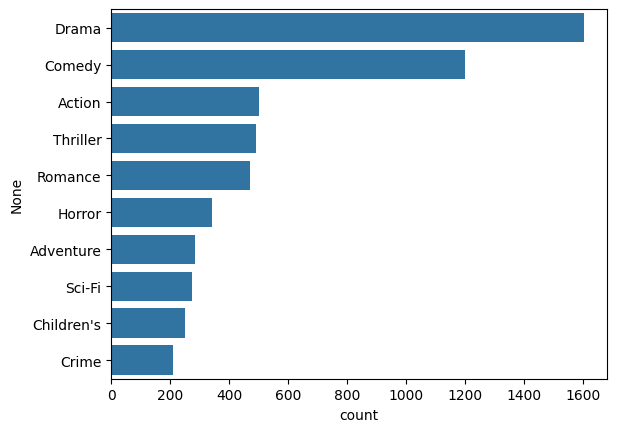

In [55]:
# sns.barplot(data=top10_genre)  # 세로 막대 그래프
sns.barplot(x=top10_genre, y=top10_genre.index)
plt.show()

## 영화 장르 하위 10개

In [56]:
low10_genre = genre_count.tail(n=10)
low10_genre

,count
Children's,251
Crime,211
War,143
Documentary,127
Musical,114
Mystery,106
Animation,105
Fantasy,68
Western,68
Film-Noir,44


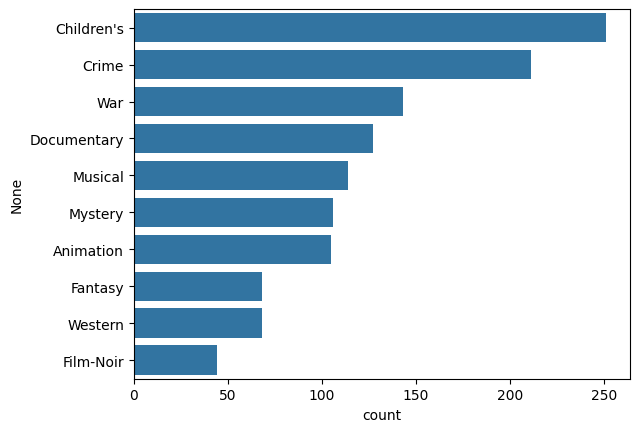

In [57]:
sns.barplot(x=low10_genre, y=low10_genre.index)
plt.show()

## 영화 개봉 연도 분석

*   영화 제목(title)에서 영화 개봉 연도를 찾아서 파생 변수(year) 생성
*   연도별 개봉 영화 수
*   그래프 시각화

In [62]:
movies['year'] = movies.title.str[-5:-1].astype('int')

In [63]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [64]:
movies.tail()

,movie_id,title,genres,year
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000
3882,3952,"Contender, The (2000)",Drama|Thriller,2000


In [65]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
 3   year      3883 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


In [67]:
year_count = movies.year.value_counts()

In [68]:
year_count

,count
year,
1996,345
1995,342
1998,337
1997,315
1999,283
...,...
1928,3
1919,3
1922,2


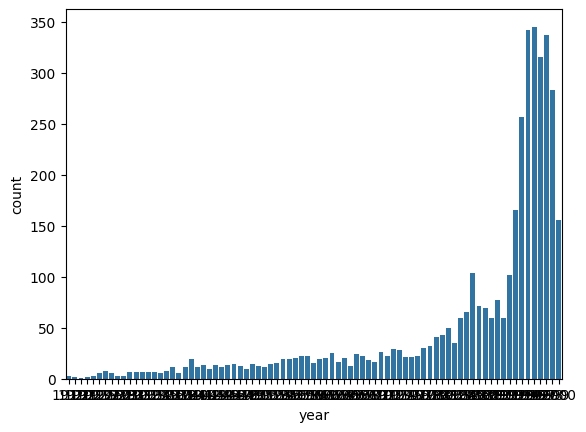

In [69]:
sns.barplot(data=year_count)
plt.show()

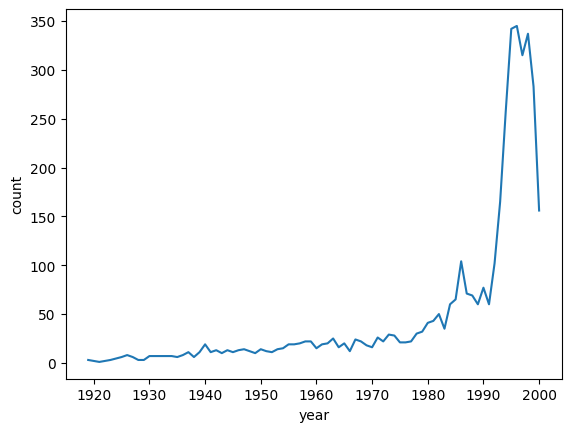

In [72]:
sns.lineplot(data=year_count)
# sns.lineplot(x=year_count.index, y=year_count)
plt.show()